In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/anaiyoshikazu/stock_docu/datasets/時価総額上位500社 - シート1.csv')

df.head()

,銘柄コード,会社名,時価総額,PER(会予),PBR,配当利回り(会予),売上高,売上総利益率,営業CF/売上比率,販管費/売上比率,...,棚卸資産,棚卸資産回転数,有形固定資産,固定負債,有利子負債,純有利子負債,純資産,自己資本,フリーCF,研究開発/売上比率
0,2914,本たばこ産業,"7,968,851",17.7,2.1,4.3,"3,149,759",55.3,20.0,46.4,...,"957,281",248.3,"907,700","2,373,398","1,726,788","522,010","3,848,727","3,766,623","479,644",2.5
1,4519,中外製薬,"14,185,201",NaN,7.4,2.9,"1,170,611",71.0,38.2,9.4,...,"233,090",250.7,"448,498","23,832",NaN,"944,550","1,907,222","1,907,222","393,211",15.1
2,6098,リクルートHD,"12,232,612",30.4,6.8,0.3,"3,416,492",57.5,15.7,44.5,...,NaN,NaN,"58,041","338,888","200,746","674,810","1,808,714","1,798,917","465,433",4.5
3,6501,立製作所,"16,814,533",23.7,2.9,NaN,"9,783,370",28.8,12.0,18.9,...,"1,566,282",82.1,"1,341,537","1,345,551","837,298","28,944","6,031,417","5,847,091","780,592",NaN
4,6758,ソニーG,"22,485,988",20.8,2.7,NaN,"11,260,037",28.2,12.2,19.1,...,"1,389,047",62.7,"1,526,777","16,380,543","2,088,195","552,251","8,524,922","8,185,199","749,267",6.6


In [3]:
import pandas as pd

# データの読み込み（例: CSVファイルから）
# df = pd.read_csv('your_file.csv')

# すでにDataFrameがあると仮定して、すべての文字列型・object型のカラムでカンマを削除
df = df.applymap(lambda x: str(x).replace(',', '') if isinstance(x, (str)) else x)

# 数値型に変換できるものは自動で変換
df = df.apply(pd.to_numeric, errors='ignore')

In [4]:
df.dtypes

銘柄コード           object
会社名             object
時価総額             int64
PER(会予)        float64
PBR            float64
配当利回り(会予)      float64
売上高            float64
売上総利益率         float64
営業CF/売上比率      float64
販管費/売上比率       float64
営業利益           float64
営業利益率          float64
当期純利益          float64
純利益率           float64
ROE            float64
自己資本比率         float64
有利子負債/総資産      float64
有利子負債/時価総額     float64
純有利子負債/時価総額    float64
DEレシオ          float64
流動比率           float64
総資産            float64
現金及び預金         float64
売上債権           float64
売上債権回転数        float64
棚卸資産           float64
棚卸資産回転数        float64
有形固定資産         float64
固定負債           float64
有利子負債          float64
純有利子負債         float64
純資産            float64
自己資本           float64
フリーCF            int64
研究開発/売上比率      float64
dtype: object

In [5]:
df = df.drop(columns=['配当利回り(会予)', '売上高', '販管費/売上比率', '営業利益', '当期純利益', '純利益率', '売上債権',
                     '売上債権回転数', '棚卸資産', '棚卸資産回転数', '有形固定資産', '固定負債', '有利子負債', '純資産',
                     '自己資本', 'フリーCF', '研究開発/売上比率', '会社名', '銘柄コード'])

df.head()

,時価総額,PER(会予),PBR,売上総利益率,営業CF/売上比率,営業利益率,ROE,自己資本比率,有利子負債/総資産,有利子負債/時価総額,純有利子負債/時価総額,DEレシオ,流動比率,総資産,現金及び預金,純有利子負債
0,7968851,17.7,2.1,55.3,20.0,10.3,4.8,45.0,20.6,21.7,6.6,0.5,166.5,8370732.0,1084567.0,522010.0
1,14185201,NaN,7.4,71.0,38.2,46.3,20.3,89.1,NaN,0.0,6.7,NaN,727.5,2139482.0,423419.0,944550.0
2,12232612,30.4,6.8,57.5,15.7,11.8,19.7,61.8,6.9,1.6,5.5,0.1,203.5,2908790.0,871812.0,674810.0
3,16814533,23.7,2.9,28.8,12.0,9.9,10.5,44.0,6.3,5.0,0.2,0.1,111.7,13284813.0,866242.0,28944.0
4,22485988,20.8,2.7,28.2,12.2,10.7,11.9,22.7,5.8,9.3,2.5,0.3,68.2,35991547.0,2491949.0,552251.0


In [6]:
df = df[['PER(会予)', 'ROE','売上総利益率', '有利子負債/総資産', 'PBR']]

df.dropna(inplace=True)
df.isna().sum()

PER(会予)      0
ROE          0
売上総利益率       0
有利子負債/総資産    0
PBR          0
dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns=['PBR'])
y = df['PBR']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr_fit = lr.fit(X_train, y_train)
print('係数:', lr.coef_)
print('切片:', lr.intercept_)

係数: [ 0.82571589  1.51240206  0.18977276 -0.11417953]
切片: 2.0828671328671327


In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr_fit = lr.fit(X_train, y_train)

print('係数:', lr.coef_)
print('切片:', lr.intercept_)

係数: [ 0.82571589  1.51240206  0.18977276 -0.11417953]
切片: 2.0828671328671327


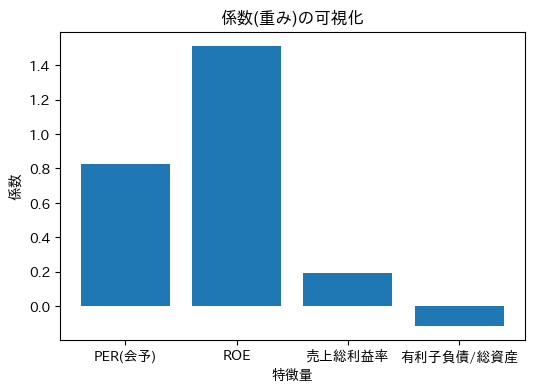

In [10]:
import matplotlib.pyplot as plt
import japanize_matplotlib

# columnsから目的変数を除去
test = df.drop(columns=['PBR'])
feature_names = test.columns


coefficients = lr.coef_

plt.figure(figsize=(6, 4))
plt.bar(feature_names, coefficients)
plt.xlabel('特徴量')
plt.ylabel('係数')
plt.title('係数(重み)の可視化')
plt.show()

In [27]:
X_new = np.array([
    [14.8, 6, 36.7, 23.7],
    [5.4, 7, 23.8, 30.5], # 燦 HD（実績ROE）
    [5.4, 13.71, 23.8, 30.5], # 予想ROE
    [8.4, 12.81, 5.7, 68],
    [7.5, 6.3, 32.1, 0],
    [16.1, 6, 12.7, 35.6],
    [14.2, 24.3, 78.9, 40.4],
    [12.4, 10, 35.1, 25.6],
    [8.3, 17, 5.7, 68], # ARE HD
    [8.4, 9.5, 7.5, 19.8]
])

X_new_sc = sc.transform(X_new)
lr_pred = lr.predict(X_new_sc)

lr_pred

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.78937506, 0.29746751, 1.89099373, 1.41728353, 0.54089223,
       0.53598126, 5.4328789 , 1.56975606, 2.40649911, 0.9659939 ])

In [12]:
X_new = np.array([
    [9.3, 8.5, 12.8, 17.6], # 三菱倉庫(1)
    [25.4, 8.6, 14.3, 31.2], # 三井倉庫(2.2)
    [13.2, 7.6, 12, 18.1], # 住友倉庫(0.9)
    [9.4, 5.2, 11, 23.9], # 日本トランスシティ(0.6)
    [10, 5.9, 11.2, 25.5], # 澁澤倉庫(0.8)
    [13, 14.4, 44.6, 0.8], # 安田倉庫(0.6)
    
])

X_new_sc = sc.transform(X_new)
lr_pred = lr.predict(X_new_sc)

lr_pred

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.85107899, 1.74288264, 0.85374578, 0.01307536, 0.20600922,
       2.91184947])

In [13]:
X_new = np.array([
   [19.5, 4.6, 37.4, 3.4], # アイサンテクノロジー
   [12.4, 34.4, 26.2, 11.3], # コンセプトテクノロジー
   [36.4, 14.6, 58, 5.8], # Arent
   [14.2, 17, 51.4, 10.6], # シーティーエス
   [14.8, 15.5, 79.2, 0], # 福井コンピュータ
   [12.1, 14.8, 52.6, 0] # 明豊ファシリティ
])

X_new_sc = sc.transform(X_new)
lr_pred = lr.predict(X_new_sc)

lr_pred

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.87212962, 7.36489429, 4.43531484, 3.60648326, 3.64604234,
       3.04326264])

In [14]:
X_new = np.array([
    [16.8, 8.3, 39.3, 1.2], # ヨクヨ
    [9.2, 11.9, 33.6, 12.4], # オカムラ
    [11.2, 13.9, 39.9, 33.3], # イトーキ
    [10.8, 10.8, 17.2, 2.2], # 内田洋行
    
])

X_new_sc = sc.transform(X_new)
lr_pred = lr.predict(X_new_sc)

lr_pred

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1.62726027, 1.90465782, 2.42558866, 1.6320442 ])

In [15]:
X_new = np.array([
    [11.5, 16.25, 54.4, 0],
    [12.3, 19.83, 10.3, 30.1],
    [12.3, 6.66, 10.3, 30.1],
    [8.8, 14.8, 16.2, 13.2],
    [15.8, 14.5, 24.9, 0],
    [14.9, 18.6, 69.1, 22.6]
])

X_new_sc = sc.transform(X_new)

lr_pred = lr.predict(X_new_sc)

lr_pred

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([3.37138604, 3.60909774, 0.48141663, 2.38245484, 2.89820835,
       4.1341573 ])

In [16]:
4.13 / 2.8

1.475